<a href="https://colab.research.google.com/github/wilszon/Clase-Inteligencia-Artificial/blob/main/Cuaderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25/02/25

#Manejo de Valores Nulos



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataset simulado
data = {
    "Edad": [23, np.nan, 21, np.nan, 25, 19, 18, 20, np.nan, 22],
    "Género": ["F", "M", np.nan, "M", "F", "F", "M", np.nan, "F", "M"],
    "Calificación": [85, np.nan, 78, 88, np.nan, 92, 75, 80, np.nan, 77],
}
df = pd.DataFrame(data)

dfc = df.copy()


# Metodo para ver la sumatoria de nulos en el dataframe
df.isnull().sum()

Edad            3
Género          2
Calificación    3
dtype: int64

In [4]:
pd.DataFrame(data)

Edad Género  Calificación
0  23.0      F          85.0
1   NaN      M           NaN
2  21.0    NaN          78.0
3   NaN      M          88.0
4  25.0      F           NaN
5  19.0      F          92.0
6  18.0      M          75.0
7  20.0    NaN          80.0
8   NaN      F           NaN
9  22.0      M          77.0

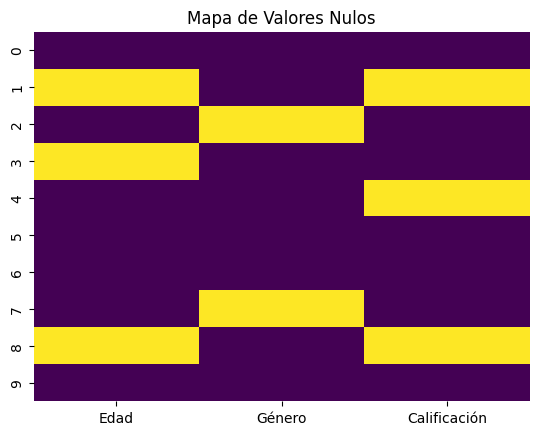

In [5]:
# Mapa de calor para visualizar nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

In [11]:
# Porcentaje de valores nulos por columna
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Visualización del porcentaje de nulos
missing_percentage.plot(kind='bar', title='Porcentaje de Nulos por Columna')
plt.ylabel('Porcentaje')
plt.show()

Edad            30.0
Género          20.0
Calificación    30.0
dtype: float64


In [12]:
# Rellenar valores nulos en "Edad" con la media
df["Edad"] = df["Edad"].fillna(df["Edad"].mean())

# Rellenar valores nulos en "Calificación" con la mediana
df["Calificación"] = df["Calificación"].fillna(df["Calificación"].median())
df

Edad Género  Calificación
0  23.000000      F          85.0
1  21.142857      M          80.0
2  21.000000    NaN          78.0
3  21.142857      M          88.0
4  25.000000      F          80.0
5  19.000000      F          92.0
6  18.000000      M          75.0
7  20.000000    NaN          80.0
8  21.142857      F          80.0
9  22.000000      M          77.0

In [13]:
# Rellenar valores nulos en "Género" con la moda
df["Género"] = df["Género"].fillna(df["Género"].mode()[0])
df

Edad Género  Calificación
0  23.000000      F          85.0
1  21.142857      M          80.0
2  21.000000      F          78.0
3  21.142857      M          88.0
4  25.000000      F          80.0
5  19.000000      F          92.0
6  18.000000      M          75.0
7  20.000000      F          80.0
8  21.142857      F          80.0
9  22.000000      M          77.0

In [14]:
from sklearn.impute import SimpleImputer

# Usar KNN para imputar valores en "Calificación"
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[["Calificación"]] = imputer.fit_transform(df[["Calificación"]])
df

Edad Género  Calificación
0  23.000000      F          85.0
1  21.142857      M          80.0
2  21.000000      F          78.0
3  21.142857      M          88.0
4  25.000000      F          80.0
5  19.000000      F          92.0
6  18.000000      M          75.0
7  20.000000      F          80.0
8  21.142857      F          80.0
9  22.000000      M          77.0

In [20]:
dfc.isnull().sum()

Edad            3
Género          2
Calificación    3
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

# Usar KNN para imputar valores en "Calificación"
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
dfc[["Calificación"]] = imputer.fit_transform(dfc[["Calificación"]])
dfc

Edad Género  Calificación
0  23.0      F     85.000000
1   NaN      M     82.142857
2  21.0    NaN     78.000000
3   NaN      M     88.000000
4  25.0      F     82.142857
5  19.0      F     92.000000
6  18.0      M     75.000000
7  20.0    NaN     80.000000
8   NaN      F     82.142857
9  22.0      M     77.000000

In [28]:
dfc

Género  Calificación
0      F     85.000000
1      M     82.142857
2    NaN     78.000000
3      M     88.000000
4      F     82.142857
5      F     92.000000
6      M     75.000000
7    NaN     80.000000
8      F     82.142857
9      M     77.000000

In [29]:
dfc.dropna(axis=0,inplace=True)
dfc

Género  Calificación
0      F     85.000000
1      M     82.142857
3      M     88.000000
4      F     82.142857
5      F     92.000000
6      M     75.000000
8      F     82.142857
9      M     77.000000

In [33]:
dfc = dfc.reset_index(drop=True)
dfc


Género  Calificación
0      F     85.000000
1      M     82.142857
2      M     88.000000
3      F     82.142857
4      F     92.000000
5      M     75.000000
6      F     82.142857
7      M     77.000000